<a href="https://colab.research.google.com/github/HarshithaNalla/FML-LAB/blob/main/LogisticRegression_titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.datasets import load_digits
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
data=pd.read_csv('/content/Titanic.csv')
data

,sex,age,sibsp,parch,fare,embarked,class,who,alone,survived
0,male,22.0,1,0,7.2500,S,Third,man,False,0
1,female,38.0,1,0,71.2833,C,First,woman,False,1
2,female,26.0,0,0,7.9250,S,Third,woman,True,1
3,female,35.0,1,0,53.1000,S,First,woman,False,1
4,male,35.0,0,0,8.0500,S,Third,man,True,0
...,...,...,...,...,...,...,...,...,...,...
886,male,27.0,0,0,13.0000,S,Second,man,True,0
887,female,19.0,0,0,30.0000,S,First,woman,True,1
888,female,NaN,1,2,23.4500,S,Third,woman,False,0
889,male,26.0,0,0,30.0000,C,First,man,True,1


In [9]:
data.describe()

,age,sibsp,parch,fare,survived
count,714.000000,891.000000,891.000000,891.000000,891.000000
mean,29.699118,0.523008,0.381594,32.204208,0.383838
std,14.526497,1.102743,0.806057,49.693429,0.486592
min,0.420000,0.000000,0.000000,0.000000,0.000000
25%,20.125000,0.000000,0.000000,7.910400,0.000000
50%,28.000000,0.000000,0.000000,14.454200,0.000000
75%,38.000000,1.000000,0.000000,31.000000,1.000000
max,80.000000,8.000000,6.000000,512.329200,1.000000


In [10]:
data.isnull().sum()

sex           0
age         177
sibsp         0
parch         0
fare          0
embarked      2
class         0
who           0
alone         0
survived      0
dtype: int64

In [11]:
data.shape

(891, 10)

In [12]:
data.columns

Index(['sex', 'age', 'sibsp', 'parch', 'fare', 'embarked', 'class', 'who',
       'alone', 'survived'],
      dtype='object')

In [13]:
data['age']/content/Titanic.csvimport seaborn as sns
ax=plt.axes()
sns.heatmap(cm,annot=True,annot_kws={"size":20},fmt='f',cmap="Blues",ax=ax)
ax.set_title('Confusion Matrix')
plt.show()

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: age, Length: 891, dtype: float64

In [14]:
data['age']=data['age'].fillna(data.groupby(['class','sex'])['age'].transform('mean'))

In [15]:
data.isnull().sum()

sex         0
age         0
sibsp       0
parch       0
fare        0
embarked    2
class       0
who         0
alone       0
survived    0
dtype: int64

In [16]:
data=data.dropna()

In [17]:
data.isnull().sum()

sex         0
age         0
sibsp       0
parch       0
fare        0
embarked    0
class       0
who         0
alone       0
survived    0
dtype: int64

In [18]:
X=data.iloc[:,:9]
y=data.iloc[:,8]

In [19]:
from sklearn.preprocessing import LabelEncoder

In [20]:
le = LabelEncoder()
X["sex"]= le.fit_transform(data['sex'])
X["embarked"]=le.fit_transform(data['embarked'])
X["class"]=le.fit_transform(data['class'])
X['who']=le.fit_transform(data['who'])
X['alone']=le.fit_transform(data['alone'])

In [21]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [22]:

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

In [23]:
#create a model and train it
model = LogisticRegression(C=0.05,multi_class='ovr',random_state=0)
model.fit(X_train,y_train)

LogisticRegression(C=0.05, multi_class='ovr', random_state=0)

In [25]:
model.score(X_train, y_train)

1.0

In [26]:
model.score(X_test, y_test)

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


0.852017937219731

In [27]:
#evaluate the model

X_test = scaler.transform(X_test)


In [28]:
confusion_matrix(y_test, y_pred)

array([[ 88,   0],
       [  0, 135]])

In [29]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       1.00      1.00      1.00        88
        True       1.00      1.00      1.00       135

    accuracy                           1.00       223
   macro avg       1.00      1.00      1.00       223
weighted avg       1.00      1.00      1.00       223



In [34]:
cm=confusion_matrix(y_test,y_pred)

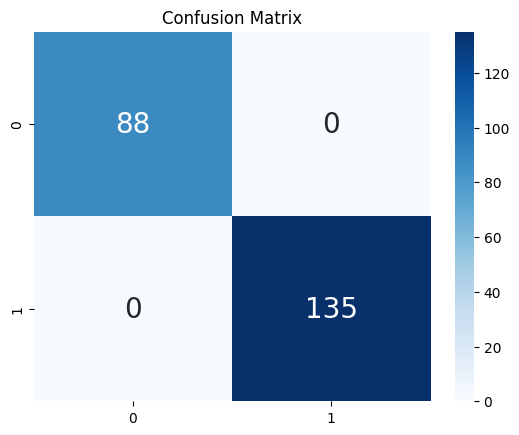

In [38]:
import seaborn as sns
ax=plt.axes()
sns.heatmap(cm,annot=True,annot_kws={"size":20},fmt='d',cmap="Blues",ax=ax)
ax.set_title('Confusion Matrix')
plt.show()